In [14]:
%matplotlib inline

import matplotlib.pyplot as plt 
import pandas 
import numpy as np 

from sklearn.preprocessing import StandardScaler

In [15]:
cols = [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm', u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm', u'tot_NLconts_pm',    u'tot_nlsurfaceE_pm', u'tot_total_charge', u'tot_total_pos_charges',    u'tot_total_neg_charges', u'tot_seq_recovery',     u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc',     u'SR_1_hbond_pm', u'SR_1_burunsat_pm', u'SR_1_pstat_pm',    u'SR_1_nlpstat_pm', u'SR_2_total_score', u'SR_2_fa_rep',    u'SR_2_hbond_sc', u'SR_2_hbond_pm',    u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',     u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc',     u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm',    u'SR_3_nlpstat_pm', u'SR_4_total_score', u'SR_4_fa_rep',    u'SR_4_hbond_sc', u'SR_4_hbond_pm',    u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc',     u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm', u'SR_5_burunsat_pm'
] 

len_feats = len( cols ) 
print len_feats

48


In [16]:
df = pandas.read_csv( '../data_sets/rosetta/enzyme_design_noncovalent_2.csv', index_col=0 )
df2 = pandas.read_csv( '../data_sets/experimental/bglb_all.csv', index_col=0 )
df3 = df2.join( df ) 

#print df3.columns
#print df3.sample( 5 ) 

In [17]:
from sklearn.linear_model import ElasticNetCV

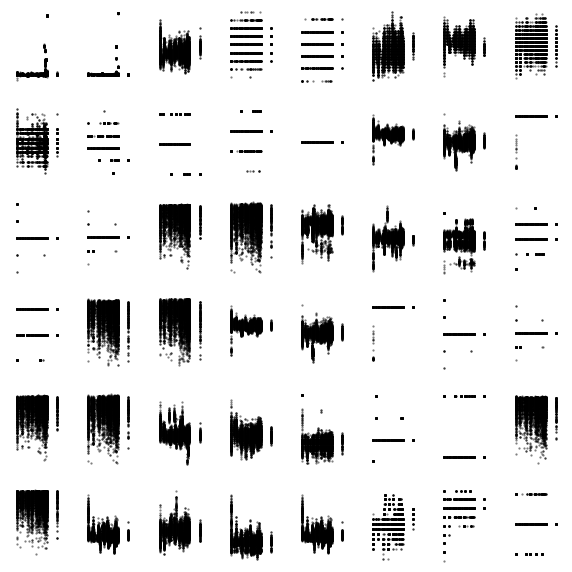

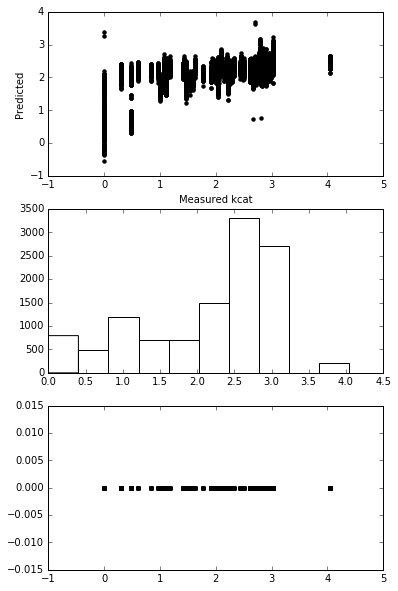

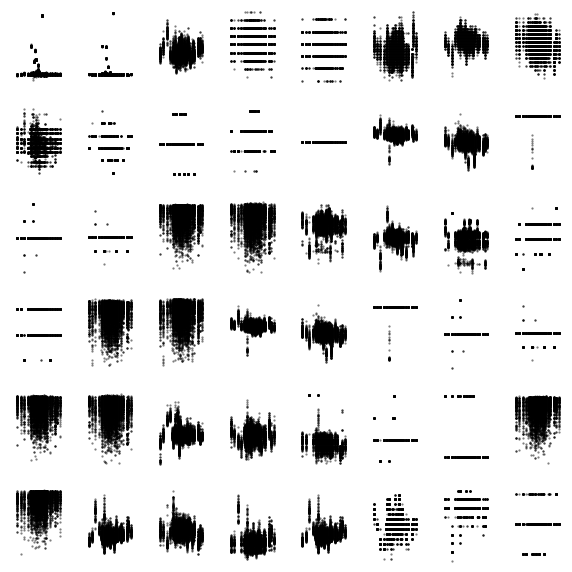

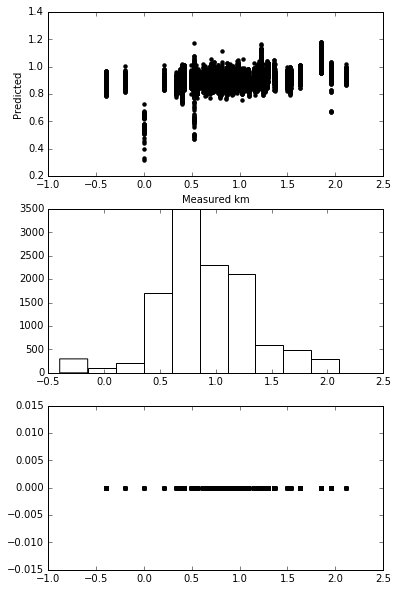

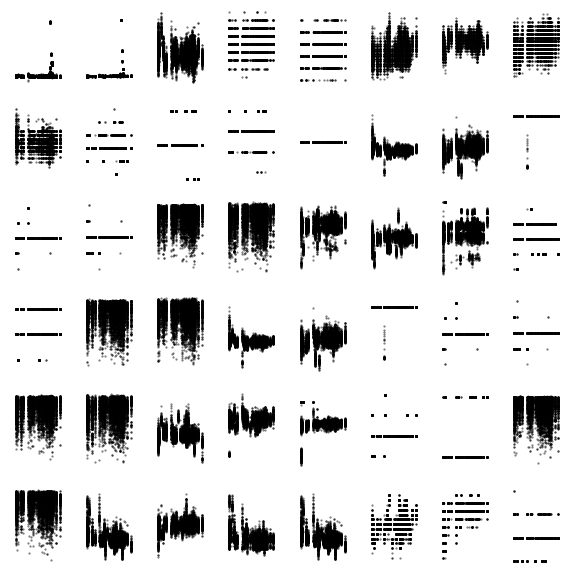

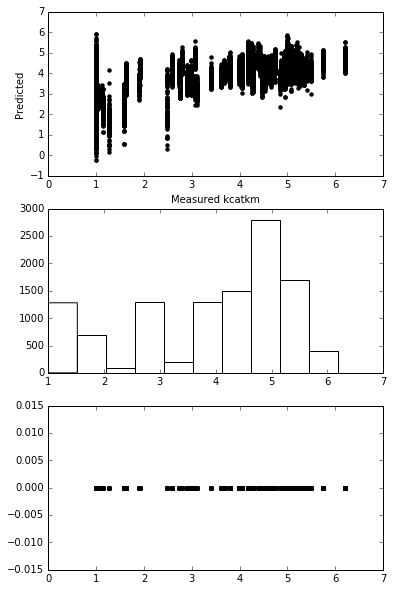

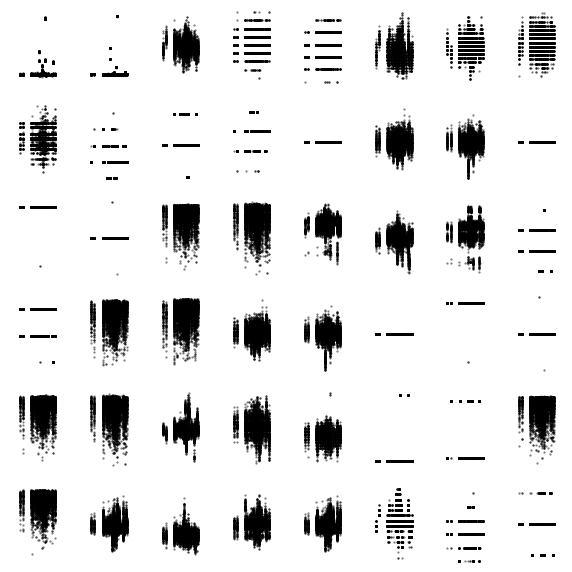

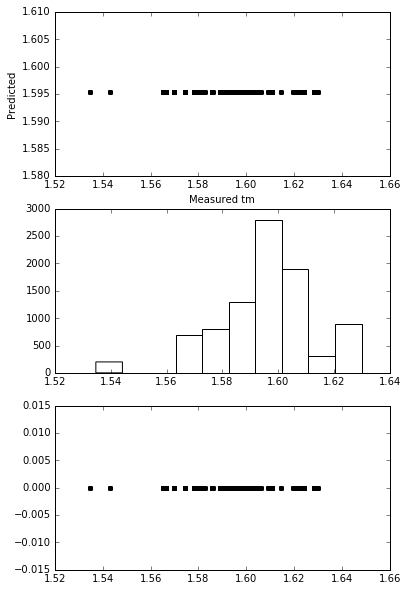

In [19]:
predictors = [ 'kcat', 'km', 'kcatkm', 'tm' ] 
scl = StandardScaler()

for p in predictors:
    
    plt.figure( figsize=( 10, 10 ) ) 
    plt.title( 'Single feature correlations {}'.format( p ) ) 
    
    my_df = df3[ cols + [ p ] ].dropna()
    X = scl.fit_transform( my_df.ix[:,:-1] )
    y = np.log10( my_df.ix[:,-1].as_matrix().ravel() )

    #plot single feature correlations
    for i in range( len_feats ):
        plt.subplot( 6, 8, i+1 ) 
        plt.scatter( y, X[:,i], lw=0, c='k', alpha=0.5, marker='.' ) 
        #plt.xticks( X[:,i], ('') )
        #plt.yticks( y, ('') )
        plt.xticks( [] )
        plt.yticks( [] )
        plt.box( 0 ) 
    plt.show()    
    
    # build elastic net models
    my_preds = []
    for j in range( 10 ):        
        net = ElasticNetCV( cv=10 )
        net.fit( X, y )
        preds = net.predict( X ) 
        my_preds.append( preds ) 
        
    my_array = np.array( my_preds ) 
    my_std = [ np.std( i ) * 1000 for i in my_array.T ]
    
    # model evaluation 
    plt.figure( figsize=( 6, 10 ) ) 
    plt.subplot( 3, 1, 1 )
    plt.scatter( y, preds, lw=0, c='k' ) 
    plt.xlabel( 'Measured {}'.format( p ) )
    plt.ylabel( 'Predicted' ) 
    plt.subplot( 3, 1, 2 )
    plt.hist( y, color='white' ) 
    plt.subplot( 3, 1, 3 ) 
    plt.scatter( y, my_std, c='k', lw=0 ) 
    plt.show()

In [ ]:
my_array = np.array( my_preds )
my_array.shape

In [ ]:
len( [ np.std( i ) for i in my_array.T ] )